# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Tradução:

**Introdução**

O objetivo deste projeto é analisar dados de biodiversidade do Serviço de Parques Nacionais, particularmente em torno de várias espécies observadas em diferentes locais de parques nacionais no que tange Animais ameaçados de Extinção.

Este projeto irá definir, analisar, preparar, traçar dados e procurar explicar os resultados da análise.

Aqui estão algumas perguntas que este projeto procurou responder:

I - Quais espécies foram mais vistas em cada parque?
II - Qual é a distribuição de conservation_status para animais?
III - Qual é a distribuição do estado de conservação das espécies?
IV - Certos tipos de espécies são mais prováveis ​​de serem ameaçados?

- 
- As diferenças entre as espécies e o seu estado de conservação são significativas?
- Qual animal é mais prevalente e qual sua distribuição entre os parques?
- Certos tipos de espécies são mais propensos a serem ameaçados de extinção?
- As diferenças entre as espécies e seu estado de conservação são significativas?
- Quais espécies foram mais vistas em cada parque?
- Qual é a distribuição de conservation_status para animais?

**Fontes de dados:**

Ambos `Observations.csv` e `Species_info.csv` foram fornecidos por [Codecademy.com](https://www.codecademy.com).

Observação: os dados deste projeto são *inspirados* em dados reais, mas são principalmente fictícios.

## 1 - Import Python Modules

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## 2 - Loading the Data

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species (classe de animal) 
- **scientific_name** - The scientific name of each species (o nome científico de cada espécie)
- **common_names** - The common names of each species (os nomes comuns de cada espécie)
- **conservation_status** - The species conservation status (estado de conservação atual de cada espécie)

#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species (o nome científico de cada espécie)
- **park_name** - The name of the national park (Parque onde as espécies foram encontradas)
- **observations** - The number of observations in the past 7 days (o número de vezes que cada espécie foi observada no parque)

In [32]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
observations = pd.read_csv('observations.csv',encoding='utf-8')

In [33]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [34]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### 2.1 Data Characteristics

In [35]:
# Dataset size (Tamanho do Dataset)
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


## 3 - Explore the Data

In [36]:
print(f"number of species: {species.scientific_name.nunique()}\n") #unique species
print(f"categories: {species.category.unique()}\n") # unique category
print(f"sum_number of categories: {species.category.nunique()}\n") # sum unique category

number of species: 5541

categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

sum_number of categories: 7



### _I - Which species were most seen in each park? (Quais espécies foram mais vistas em cada parque?)_

In [37]:
species.groupby("category").size().sort_values(ascending=False) #quantity per category

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

In [38]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}\n") #status conservation
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4

unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


### _II - What is the distribution of conservation_status for animals? (Qual é a distribuição de conservation_status para animais?)_


In [39]:
print(f"na values:{species.conservation_status.isna().sum()}\n") #exclude null numbers

print(species.groupby("conservation_status").size())

na values:5633

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [40]:
print(f"number of parks:{observations.park_name.nunique()}\n") #names unique park
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4

unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [41]:
print(f"number of observations:{observations.observations.sum()}") #Observation of the last 7 days

number of observations:3314739


## 4 - Analysis

In [42]:
#In the exploration, a lot of `nan` values were detected.These values will need to be converted to `No Intervention`.

species["conservation_status"] = species["conservation_status"].fillna("No Intervention")
species.groupby("conservation_status").size().sort_values(ascending=False)

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

### _III - What is the distribution of species conservation status?(Qual é a distribuição do estado de conservação das espécies?)_

In [43]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [44]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [45]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


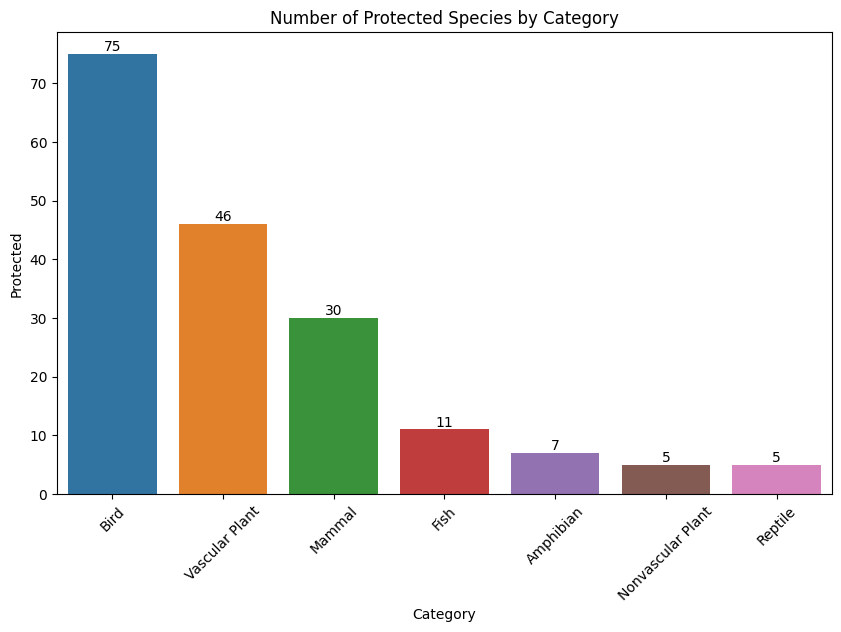

In [46]:

df = pd.DataFrame(category_counts)
df = df.sort_values('protected', ascending=False)  

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='category', y='protected', data=df)
plt.xlabel('Category')
plt.ylabel('Protected')
plt.title('Number of Protected Species by Category')


for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


### _IV - Are certain types of species more likely to be threatened? (Certos tipos de espécies são mais prováveis ​​de serem ameaçados?)_


In [47]:
df = pd.DataFrame(category_counts)

df['percentage_protected'] = round((df['protected'] / (df['not_protected'] + df['protected'])) * 100, 2)
df = df.sort_values('percentage_protected', ascending=False)

print(df)

            category  not_protected  protected  percentage_protected
3             Mammal            146         30                 17.05
1               Bird            413         75                 15.37
0          Amphibian             72          7                  8.86
2               Fish            115         11                  8.73
5            Reptile             73          5                  6.41
4  Nonvascular Plant            328          5                  1.50
6     Vascular Plant           4216         46                  1.08
